In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 300)

plt.style.use('seaborn-v0_8')

In [2]:
### Carregar dataset
df = pd.read_csv('Salary_Data_Based_country_and_race.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df = df.rename(columns={'Education Level': 'Education_Level', 
                        'Job Title': 'Job_Title', 
                        'Years of Experience': 'Years_of_Experience'})
print(df.shape)

(6704, 8)


In [3]:
df.head(3)

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White


In [4]:
df.tail(3)

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary,Country,Race
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean
6703,26.0,Female,High School,Sales Executive,1.0,35000.0,Canada,Black


In [5]:
### informações gerais da tabela, contagem de nan(s)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education_Level      6701 non-null   object 
 3   Job_Title            6702 non-null   object 
 4   Years_of_Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


Como se observa, há variaveis com valores faltantes

In [6]:
### para facilitar o trabalho, faço a separação das colunas numéricas e categóricas

d_col = {'num':[], 'cat':[]} 
for col in df.columns:
    if df[col].dtype=='object':
        df[col] = df[col].str.lower().str.replace(' ', '_')
        d_col['cat'].append(col)
    else:
        d_col['num'].append(col)

In [7]:
### preenchimento dos missings

## fill missing colunas numéricas pela mediana
for col in d_col['num']:
    df[col] = df[col].fillna(value=df[col].median())
    
## fill missing colunas categóricas pela moda
for col in d_col['cat']:
    df[col] = df[col].fillna(value=df[col].mode().squeeze()) 

In [8]:
d_col

{'num': ['Age', 'Years_of_Experience', 'Salary'],
 'cat': ['Gender', 'Education_Level', 'Job_Title', 'Country', 'Race']}

## Análise exploratória univariada

In [9]:
## describe das distrinuições das variaveis 'Age', 'Years_of_Experience' e no target 'Salary'

df[d_col['num']].describe()

,Age,Years_of_Experience,Salary
count,6704.000000,6704.000000,6704.000000
mean,33.620376,8.094197,115326.720913
std,7.613548,6.057691,52766.493471
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


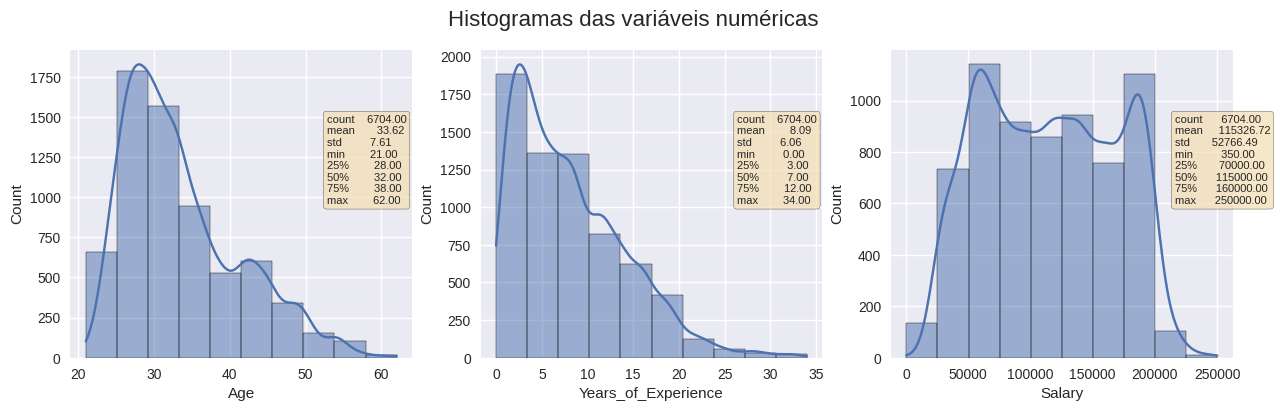

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Years_of_Experience', 'Salary']

sns.histplot(df['Age'], bins = 10, kde=True, ax=axes[0])
desc = df['Age'].describe()
text = str(desc.round(decimals=2)).split('\nName')[0]
axes[0].text(.75, .5, text, fontsize=8, transform=axes[0].transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=.7))

sns.histplot(df['Years_of_Experience'], bins = 10, kde=True, ax=axes[1])
desc = df['Years_of_Experience'].describe()
text = str(desc.round(decimals=2)).split('\nName')[0]
axes[1].text(.75, .5, text, fontsize=8, transform=axes[1].transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=.7))

sns.histplot(df['Salary'], bins = 10, kde=True, ax=axes[2])
desc = df['Salary'].describe()
text = str(desc.round(decimals=2)).split('\nName')[0]
axes[2].text(.83, .5, text, fontsize=8, transform=axes[2].transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=.7))
plt.suptitle('Histogramas das variáveis numéricas', fontsize=16)
plt.show()

Podemos ver que para a variável "Age" há uma maior concetração de individuos entre 25 e 35 anos, a partir do qual decai até os 62 anos, que é uma idade média razoavel para o desligamento do mercado de trabalho.

Há uma relação entre "Age" e "Years_of_Experience". Ou seja, pessoas mais velhas tendem a ter mais tempo de experiencia. O que explica a semelhança entre as distribuições.

Para a variável "Salary", sua amplitude, de 350 à 250K, bastante alta apesar de que as distancias entre a mediana e os valores minimo (115000-350=114650) e maximo (250000-115000=135000) são aproximadas, o que podem indicar que não há uma concentração de renda expressiva. 

In [11]:
### quantidade de classes únicas por variáveis categóricas
for col in d_col['cat']:
    print(col, df[col].nunique())

Gender 3
Education_Level 6
Job_Title 192
Country 5
Race 10



Em "Job_Title" há 192 classes e por isso serão investigados quais são essas profissões.

In [12]:
### contagem das classes em 'Job_Title'
job_vc = pd.concat([df['Job_Title'].value_counts(), df['Job_Title'].value_counts(normalize=True)], axis=1).reset_index()
job_vc['cumulative'] = job_vc['proportion'].cumsum()

In [13]:
job_vc.head(3)

,Job_Title,count,proportion,cumulative
0,software_engineer,520,0.077566,0.077566
1,data_scientist,453,0.067572,0.145137
2,software_engineer_manager,376,0.056086,0.201223


In [14]:
job_vc.tail(3)

,Job_Title,count,proportion,cumulative
189,help_desk_analyst,1,0.000149,0.999702
190,senior_training_specialist,1,0.000149,0.999851
191,supply_chain_analyst,1,0.000149,1.000000


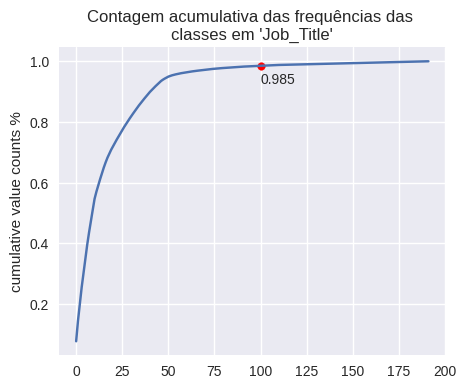

In [15]:
plt.figure(figsize=(5, 4))
plt.title("Contagem acumulativa das frequências das \nclasses em 'Job_Title'")
plt.plot(range(len(job_vc)), job_vc['cumulative'])
plt.scatter(100, job_vc['cumulative'][100], color='red', s=30)
plt.text(100, job_vc['cumulative'][100]*.94, '%.3f' %job_vc['cumulative'][100])
plt.ylabel('cumulative value counts %')
plt.show()

O gráfico indica que 100 dos 192 'Job_Title' mais frequentes correspondem à 98,5% da base.
Portanto, sobra um grande volume de 'Job_Title' únicos que aparecem com uma frequencia bastante baixa.

In [16]:
### classes por variaveis categóricas
for col in d_col['cat']:
    if col!='Job_Title':
        print(col,':' ,df[col].value_counts())
        print('-----------\n')

Gender : Gender
male      3676
female    3014
other       14
Name: count, dtype: int64
-----------

Education_Level : Education_Level
bachelor's_degree    2270
master's_degree      1573
phd                  1369
bachelor's            756
high_school           448
master's              288
Name: count, dtype: int64
-----------

Country : Country
usa          1360
china        1343
uk           1337
australia    1336
canada       1328
Name: count, dtype: int64
-----------

Race : Race
white               1968
asian               1603
korean               457
australian           452
chinese              444
black                437
african_american     354
mixed                334
welsh                333
hispanic             322
Name: count, dtype: int64
-----------



Em "Gender", há apenas 14 ocorrencias para a classe "other". Dada sua insignificancia numérica, será removida do dataset.

Para o "Education_Level" há classes que devem ser corrigidas. Será necessário juntar o "bachelor's_degree" com "bachelor's" e "master's_degree" com "master's".

Quanto ao "Race" parece haver informações imprecisas, dessa forma o "asian" agrupará "chinese" e "korean"; "white" agrupará "australian" e "welsh"; "black" agrupará "african_american"


In [17]:
### adequação das variaveis 'Gender', 'Education_Level' e 'Race' de acordo com as exploração dos dados

df = df[df['Gender']!='other']
df['Education_Level'] = df['Education_Level'].replace({"bachelor's_degree": "bachelor's", "master's_degree": "master's"})
df['Race'] = df['Race'].replace({'australian': 'white', 'welsh': 'white', 'korean': 'asian', 'chinese': 'asian', 'african_american': 'black'})

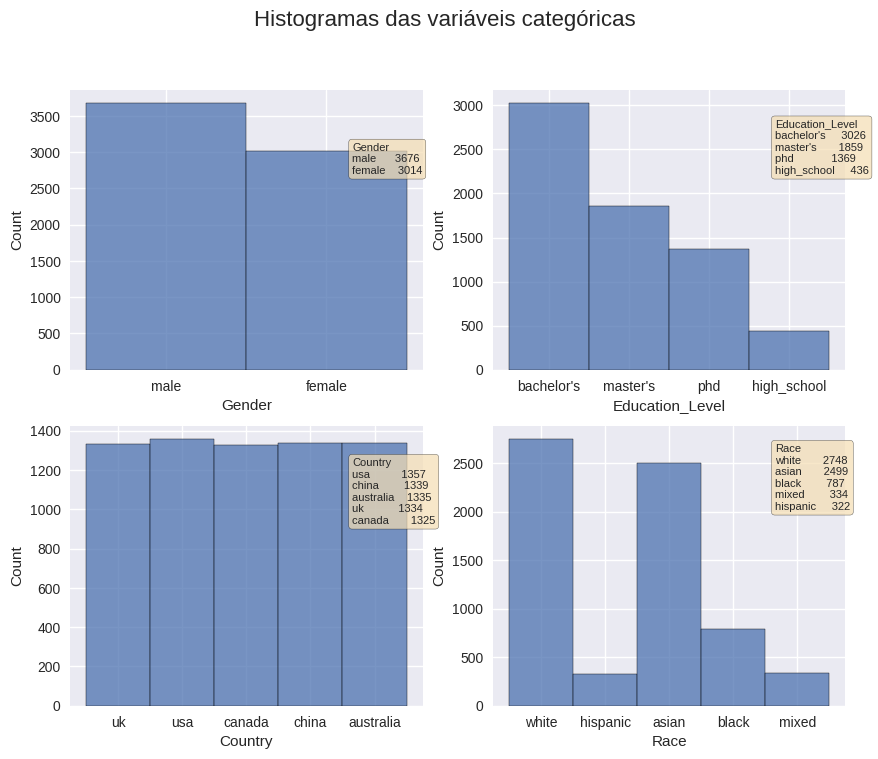

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
cols = ['Gender', 'Education_Level', 'Country', 'Race']

sns.histplot(df['Gender'], bins = 10, ax=axes[0,0])
desc = df['Gender'].value_counts()
text = str(desc).split('\nName')[0]
axes[0,0].text(.8, .7, text, fontsize=8, transform=axes[0,0].transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=.7))

sns.histplot(df['Education_Level'], bins = 10, ax=axes[0,1])
desc = df['Education_Level'].value_counts()
text = str(desc).split('\nName')[0]
axes[0,1].text(.8, .7, text, fontsize=8, transform=axes[0,1].transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=.7))

sns.histplot(df['Country'], bins = 10, ax=axes[1,0])
desc = df['Country'].value_counts()
text = str(desc).split('\nName')[0]
axes[1,0].text(.8, .65, text, fontsize=8, transform=axes[1,0].transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=.7))

sns.histplot(df['Race'], bins = 10, ax=axes[1,1])
desc = df['Race'].value_counts()
text = str(desc).split('\nName')[0]
axes[1,1].text(.8, .7, text, fontsize=8, transform=axes[1,1].transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=.7))

plt.suptitle('Histogramas das variáveis categóricas', fontsize=16)
plt.show()

## Análise exploratória bivariada

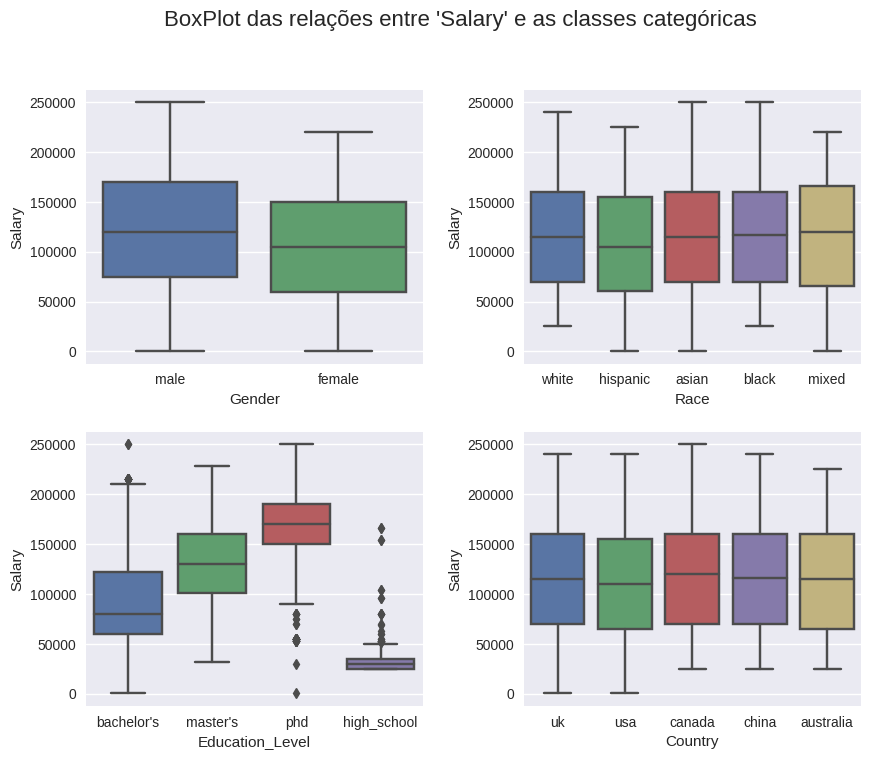

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(df[['Gender', 'Salary']], x='Gender', y='Salary', ax=axes[0,0])
sns.boxplot(df[['Race', 'Salary']], x='Race', y='Salary', ax=axes[0,1])
sns.boxplot(df[['Education_Level', 'Salary']], x='Education_Level', y='Salary', ax=axes[1,0])
sns.boxplot(df[['Country', 'Salary']], x='Country', y='Salary', ax=axes[1,1])
plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.suptitle("BoxPlot das relações entre 'Salary' e as classes categóricas", fontsize=16)
plt.show()

O "Gender" e "Education_Level" são as variáveis com maiores impacto na diferença salarial. O homem tem a mediana salarial um pouco maior que o da mulher, quanto ao nivel educacional podemos dizer que quanto mais alto o nivel acadêmico, maior é o salario.

In [20]:
from scipy.stats import mannwhitneyu

print('teste de hipotese\n')
print('H0: Existe igualdade estatisticamente significativa entre os grupos\n')

g1 = df[df['Gender']=='male']['Salary']
g2 = df[df['Gender']=='female']['Salary']

U1, p = mannwhitneyu(g1, g2)
U1, p
alpha = .05
if p<alpha:
    print('Rejeita H0: As distribuições salariais dos gêneros são diferentes')
else:
    print('Não rejeita H0: As distribuições salariais dos gêneros são iguais')

teste de hipotese

H0: Existe igualdade estatisticamente significativa entre os grupos

Rejeita H0: As distribuições salariais dos gêneros são diferentes


In [21]:
print('teste de hipotese\n')
print('H0: Existe igualdade estatisticamente significativa entre os grupos\n')

g1 = df[df['Race']=='white']['Salary']
g2 = df[df['Race']=="black"]['Salary']

U1, p = mannwhitneyu(g1, g2)
U1, p
alpha = .05
if p<alpha:
    print('Rejeita H0: As distribuições salariais entre brancos e negros são diferentes')
else:
    print('Não rejeita H0: As distribuições salariais entre brancos e negros são iguais')

teste de hipotese

H0: Existe igualdade estatisticamente significativa entre os grupos

Não rejeita H0: As distribuições salariais entre brancos e negros são iguais


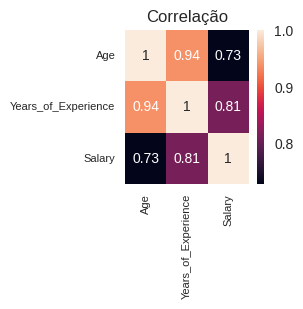

In [22]:
plt.figure(figsize=(2, 2))
plt.title('Correlação')
sns.heatmap(df[['Age', 'Years_of_Experience', 'Salary']].corr(), annot=True)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

/home/guilherme_gauss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

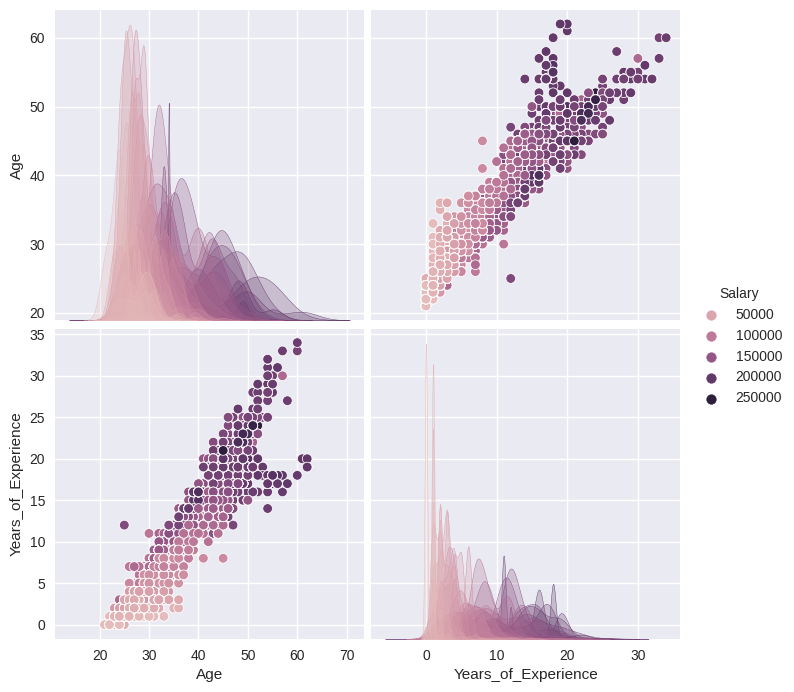

In [23]:
plt.figure(figsize=(3, 3))
sns.pairplot(df, hue='Salary', height=3.5)
plt.show()

Há uma forte correlação positiva entre "Age" e "Years_of_Experience", de forma que um dos dois pode ser removidos do modelo.<br>
Verifica-se que pessoar mais velhas e mais experientes recebem um salário maior



O boxplot de 'Education_Level' e 'Salary' indica que o nivel educacional influenciam no salário. <br>
Vale investigar se para os niveis educacionais mais altos há diferença entre os gêneros.

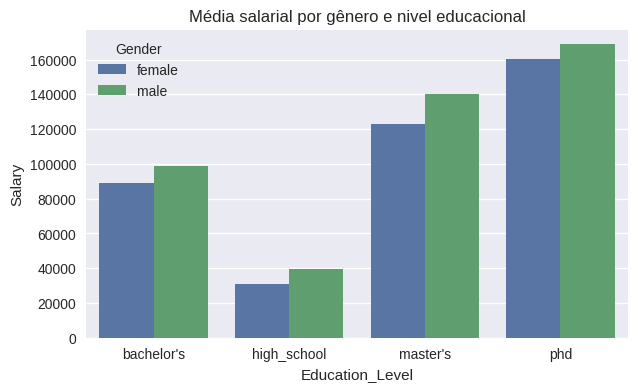

In [24]:
plt.figure(figsize=(7, 4))
plt.title('Média salarial por gênero e nivel educacional')
tmp_ge = df.groupby(['Education_Level', 'Gender'])['Salary'].mean().reset_index()
sns.barplot(tmp_ge, x="Education_Level", y="Salary", hue="Gender")
plt.show()

Para todos os niveis educacionais, o homem tem o salário razoavelmente superior ao das mulheres. <br>


In [25]:
print('teste de hipotese\n')
print('H0: Existe igualdade estatisticamente significativa entre os grupos\n')

g1 = df[(df['Education_Level']=='phd') & (df['Gender']=='male')]['Salary']
g2 = df[(df['Education_Level']=='phd') & (df['Gender']=='female')]['Salary']

U1, p = mannwhitneyu(g1, g2)
U1, p
alpha = .05
if p<alpha:
    print('Rejeita H0: As distribuições salariais entre homens e mulheres phd são diferentes')
else:
    print('Não rejeita H0: As distribuições salariais homens e mulheres phd são iguais')

teste de hipotese

H0: Existe igualdade estatisticamente significativa entre os grupos

Rejeita H0: As distribuições salariais entre homens e mulheres phd são diferentes


In [26]:
print('teste de hipotese\n')
print('H0: Existe igualdade estatisticamente significativa entre os grupos\n')

g1 = df[(df['Education_Level']=="master's") & (df['Gender']=='male')]['Salary']
g2 = df[(df['Education_Level']=="master's") & (df['Gender']=='female')]['Salary']

U1, p = mannwhitneyu(g1, g2)
U1, p
alpha = .05
if p<alpha:
    print('Rejeita H0: As distribuições salariais entre homens e mulheres com mestrado são diferentes')
else:
    print('Não rejeita H0: As distribuições salariais homens e mulheres com mestrado são iguais')

teste de hipotese

H0: Existe igualdade estatisticamente significativa entre os grupos

Rejeita H0: As distribuições salariais entre homens e mulheres com mestrado são diferentes
